In [1]:
import os
import subprocess
import pandas as pd
import geopandas as gpd
import numpy as np

from libpysal import weights
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import geoviews as gv
#import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
#gv.extension('matplotlib', 'bokeh')
#gv.output(backend='bokeh')

In [2]:
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from variables import ancillary_POPdata_folder_path, ancillary_data_folder_path, city
from csv_to_raster import createFolder

In [3]:
year = 2018
df = gpd.read_file(ancillary_POPdata_folder_path + '/{0}/temp_shp/{0}_dataVectorGrid.geojson'.format(year))
selectedColumns = df[['grid_id','geometry','l1_totalpop','totalMig','nld', 'EuropeNotEU', 'EuropeEUnoLocal',  'Central_Asia', 'Eastern_Asia', 'Southern-Eastern_Asia', 'Southern_Asia', 
                'Western_Asia', 'Northern_America', 'Latin_America_and_the_Caribbean', 'Northern_Africa', 'Sub-Saharan_Africa']]
frame = selectedColumns.copy()

In [4]:
income_df = gpd.read_file(os.path.dirname(ancillary_data_folder_path) + '/temp_shp/home_prices/{0}_residenceValue.geojson'.format(year))
incDF = income_df[['grid_id','price_mean']]
#print(incDF.head(3))


In [5]:
ndf = frame.merge(incDF, how="inner", on= 'grid_id')
#print(ndf.head(3))

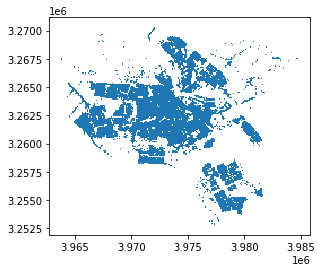

In [6]:
ndf = ndf.fillna(0)
ndf.plot()

In [18]:
la =ndf.copy()
#la = la[la.geoid.str[:5]=='06037']
wq = weights.Queen.from_dataframe(ndf)

C:\Users\NM12LQ\Anaconda3\envs\popnet_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 201 disconnected components.
 There are 117 islands with ids: 2, 63, 64, 76, 89, 218, 298, 368, 443, 490, 525, 551, 650, 721, 826, 971, 1097, 1125, 1186, 1187, 1222, 1223, 1260, 1297, 1298, 1334, 1448, 1483, 1484, 1550, 1587, 1603, 1736, 1838, 1957, 1963, 2009, 2068, 2126, 2190, 2191, 2291, 2358, 2598, 2848, 3041, 3546, 3705, 3706, 3879, 3924, 4054, 4606, 4695, 5247, 5272, 5300, 5348, 5398, 5400, 5508, 5899, 5939, 5966, 6031, 6032, 6143, 6190, 6191, 6245, 6247, 6329, 6330, 6334, 6360, 6376, 6470, 6539, 6578, 6589, 6688, 6791, 6879, 6954, 7024, 7084, 7091, 7124, 7148, 7159, 7161, 7172, 7188, 7195, 7210, 7216, 7237, 7287, 7295, 7309, 7333, 7354, 7371, 7382, 7386, 7423, 7440, 7449, 7467, 7479, 7483, 7484, 7489, 7493, 7504, 7507, 7508.
  warnings.warn(message)


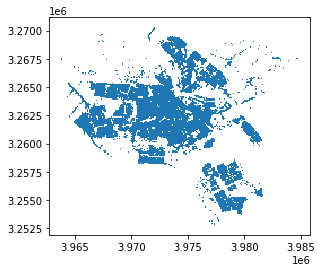

In [19]:
#la = la.iloc[wq.component_labels==0]
la.plot()

In [14]:
columns = ['price_mean', 'EuropeNotEU', 'EuropeEUnoLocal', 'Southern-Eastern_Asia', 'Southern_Asia', 
                'Western_Asia', 'Northern_America']

In [ ]:
scaler = StandardScaler()

In [ ]:
la_kmeans = KMeans(n_clusters=6).fit(scaler.fit_transform(la[columns]))
la_kmeans.labels_
la['kmeans'] = la_kmeans.labels_

In [ ]:
la.hvplot(c='kmeans', cmap='tab10', line_width=0.1, alpha=0.7,  geo=True, tiles='CartoLight',  xaxis=False, yaxis=False, height=500, colorbar=False)
la.groupby('kmeans')[columns].mean()


In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(16,8))
ax=ax.flatten()
for i, col in enumerate(columns):
    sns.violinplot(data=la, y=col, x=la.kmeans, ax=ax[i])
    ax[i].set_title(col.replace("_", " ").title())
plt.tight_layout()